In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
desc = df.T.describe()

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.widgets import Slider
from matplotlib import cm

<IPython.core.display.Javascript object>


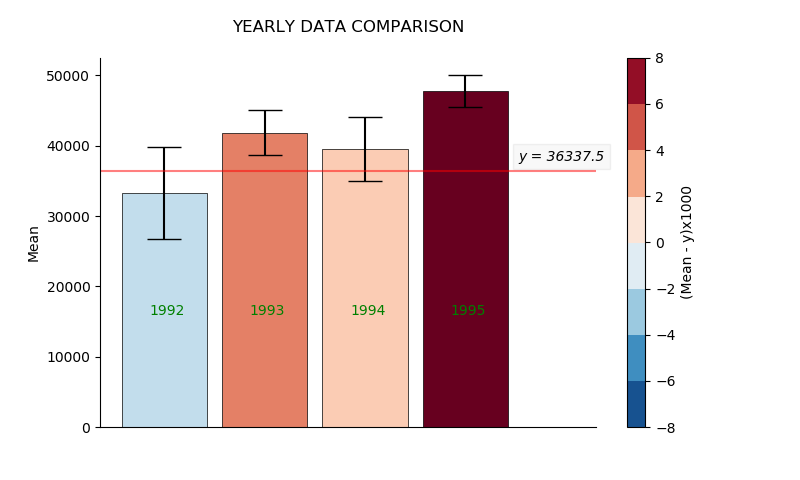

7

In [4]:
# Calculate each years mean value
mean_list = []
for year in df.index:
    mean_list.append(df.loc[year].mean())

# Calculate 95% Mean Confidence Intervals
conf_int = []
for year in desc.columns:
    conf_int.append(1.96 * desc.loc['std'][year] / math.sqrt(3650))

# Prepare the colorbar
c_range = np.arange(-8, 9, 2)
colors = cm.RdBu_r(np.arange(9) / max(np.arange(9)))
plt.figure(figsize=[8, 4.8])
tagger = plt.scatter(c_range, c_range, c = c_range, cmap = 'RdBu_r')
plt.clf()
plt.colorbar(tagger, norm=True, orientation='vertical',
             boundaries=c_range, label='(Mean - y)x1000')

#Draw the bars
graph = plt.bar(df.index, mean_list, width=0.85, tick_label=df.index,
                yerr=conf_int, capsize=12, color=colors[4:9], alpha=1,
                linewidth=0.5, edgecolor='k')

ax = plt.gca()
ax.set_title('YEARLY DATA COMPARISON\n')
ax.set_xlim(1991.36, 1996.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(bottom=False, labelbottom=False)
ax.set_ylabel('Mean')

for year in range(1992, 1996):
    year = year - 0.15
    ax.text(year, 16000, '{}'.format(round(year)), color='g')

# Draw the guideline
line = ax.axhline(40000, c='r', alpha=0.5)
y_info = plt.text(1995.53, 41500, 'max = ...', style='italic',
                  bbox={'facecolor': 'grey', 'alpha': 0.05})

# Interactivity!
def mouse_move(event):
    y = round(event.ydata, 1)
    line.set_ydata(y)
    y_info.set_position([1995.53, y + 1500])
    y_info.set_text('y = {}'.format(y))
    for i,avg in enumerate(mean_list):
        avg = float('%1.1f' % avg)
        diff = int((avg - y) / 1000)
        if diff <= -8:
            graph[i].set_facecolor(colors[0])
        elif -8 < diff <= -6:
            graph[i].set_facecolor(colors[1])
        elif -6 < diff <= -4:
            graph[i].set_facecolor(colors[2])
        elif -4 < diff <= -2:
            graph[i].set_facecolor(colors[3])
        elif -2 < diff < 2:
            graph[i].set_facecolor(colors[4])
        elif 2 <= diff < 4:
            graph[i].set_facecolor(colors[5])
        elif 4 <= diff < 6:
            graph[i].set_facecolor(colors[6])
        elif 6 <= diff < 8:
            graph[i].set_facecolor(colors[7])
        elif diff >= 8:
            graph[i].set_facecolor(colors[8])

plt.connect('motion_notify_event', mouse_move)